In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from workflow.scores.ospa import score_craters_on_patch
from workflow.scores.mask import mask_detection

In [13]:
nt = 8
margin = 20.
patch = 224.
rmax = 60.
rmin = 2.

resx = 0.9
resr = 0.9

eff = 0.9
fake = 0.1
dup = 0.5

ct = 'g'
cp = 'r'

In [14]:
# Simulate true craters
xt = (patch+2*margin)*np.random.random(nt)-margin
yt = (patch+2*margin)*np.random.random(nt)-margin
rt = np.abs((rmax-rmin)*np.random.random(nt)-rmin)

In [15]:
# Simulate detected craters, drop some
xp = (xt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)]
yp = (yt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)]
rp = np.abs((rt+2.*resr*(np.random.random(nt)-0.5))[:int(nt*eff)])

# Add fake detected craters
xp = np.append(xp,(patch+2*margin)*np.random.random(int(nt*fake))-margin,0)
yp = np.append(yp,(patch+2*margin)*np.random.random(int(nt*fake))-margin,0)
rp = np.abs(np.append(rp,(rmax-rmin)*np.random.random(int(nt*fake))-margin,0))

# Add duplicate craters
xp = np.append(xp,(xt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)-int(nt*(1.-dup))])
yp = np.append(yp,(yt+rt*2.*resx*(np.random.random(nt)-0.5))[:int(nt*eff)-int(nt*(1.-dup))])
rp = np.abs(np.append(rp,(rt+2.*resr*(np.random.random(nt)-0.5))[:int(nt*eff)-int(nt*(1.-dup))]))


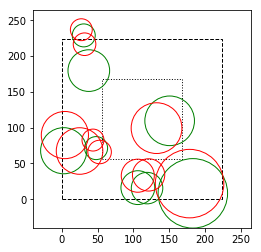

In [16]:
ax = plt.gca()
ax.cla() # clear things for fresh plot

detectpatch = plt.Rectangle((0,0), patch, patch, fill=False, linestyle = 'dashed')
ax.add_artist(detectpatch)

scorepatch = plt.Rectangle((patch/4, patch/4), patch/2, patch/2, fill=False, linestyle = 'dotted')
ax.add_artist(scorepatch)

for (x,y),r in zip(zip(xt,yt),rt):
    circle = plt.Circle((x, y), r, fill=False,color=ct)
    ax.add_artist(circle)
    
for (x,y),r in zip(zip(xp,yp),rp):
    circle = plt.Circle((x, y), r, fill=False,color=cp)
    ax.add_artist(circle)

plt.axes().set_aspect('equal')
ax.set_xlim([-2*margin,patch+2*margin])
ax.set_ylim([-2*margin,patch+2*margin])
plt.show()  


In [17]:
# Combine columns
y_true = np.array([xt,yt,rt]).T
y_pred = np.array([xp,yp,rp]).T

In [18]:
# Strip edges
y_true = y_true[(y_true[:,0]>= 56) & (y_true[:,0] < 168) & (y_true[:,1]>= 56) & (y_true[:,1] < 168)]
y_pred = y_pred[(y_pred[:,0]>= 56) & (y_pred[:,0] < 168) & (y_pred[:,1]>= 56) & (y_pred[:,1] < 168)]

In [19]:
# Score
score_craters_on_patch(y_true,y_pred)

0.97583207561085283

In [20]:
score_craters_on_patch(y_pred,y_true)

0.97583207561085283

In [21]:
mask_detection(y_true,y_pred)

0.78027812895069548

In [22]:
mask_detection(y_pred,y_true)

0.78027812895069548